<a href="https://colab.research.google.com/github/JeanCCA/ProyectoS4/blob/main/proyecto4to.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Escriba el ID del usuario: 183782


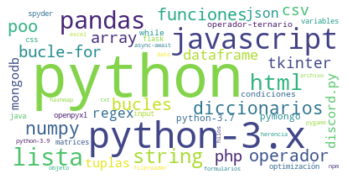

In [2]:
import matplotlib.pyplot as plt
import requests
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from bs4 import BeautifulSoup as bs
% matplotlib inline


# noinspection PyArgumentList

class Usuario:
    """Clase Usuario"""
    usuario = input("Escriba el ID del usuario: ")
    def __init__(self):
        self.url = URL()
        """Apunta a URL"""

def generar():
    """Método para buscar al usuario escogido en la Url"""
    url = "https://es.stackoverflow.com/users/" + Usuario.usuario + "?tab=tags"
    return url


class URL:
    """Clase URL"""
    def __init__(self):
        pass
# noinspection PyTypeChecker
res = requests.get(generar())
soup = bs(res.content)

etiqueta = soup.find_all('a', class_='post-tag')
frecuencia = soup.find_all('div', class_='answer-votes')


class Frecuencia:
    """Clase Frecuencia"""
    frecu = []
    text = [i.text for i in etiqueta]
    for i in frecuencia:
        freq = str(i.text)
        if freq.endswith('k'):
            freq = freq.replace('k','000')
        if int(freq) >= 0:
            if int(freq) == 0:
                freq = str("1")
            frecu.append(int(freq))

    if len(text) > len(frecu):
        text.pop(0)
    def frecuencia(self):
        """Frecuencia apunta a si misma"""
    def usuario(self):
        """Usuario apunta a si mismo"""
    def __init__(self):
        self.url = URL()
        """Relaciona a la frecuencia con el URL"""

def frecu():
    """Método Frecuencia"""


diccionario = dict(zip(Frecuencia.text, Frecuencia.frecu))
"""Diccionario, agrega la frecuencia y texto que se podrá"""


class WC1():
    """Clase WordCloud, genera la nube de palabras en base al diccionario"""
    def generate_from_frequencies(self, diccionario):
        """Método Frecuencia"""
    def wordcloud(self):
        """WordCloud apunta a si mismo"""
    def __init__(self):
        self.usuario = Usuario()
        self.frecuencia = Frecuencia()
        """El método relaciona al Wordcloud con el Usuario y Frecuencia"""

class Wordcloud():
    """Clase WordCloud, genera el wordcloud partiendo de las frecuencias"""
    wordcloud = WordCloud(max_font_size=70, max_words=100, background_color="white").generate_from_frequencies(diccionario)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    
    def __init__(self):
        self.wordcloud = WC1()
        self.usuario = Usuario()
        """Método Unión de wordcloud con usuario y a si mismo"""
